<a href="https://colab.research.google.com/github/tenzyus006/Revision-Excel-for-Data-Analysis/blob/main/Another_copy_of_CLEANED_WANGMO_Tenzin_1_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**P4_Catégorisez automatiquement des questions**

#**Objectif**



**Aider à Stack Overflow à améliorer la gestion des tags, pour suggérer ou proposer des tags automatiquement à la question posée.**

#**Problématique à traiter**

**Comment identifier et suggérer automatiquement des tags pertinents à partir du contenu textuel (titre et corps) des questions posées sur Stack Overflow, afin d'améliorer la recherche, le classement et la visibilité des questions ?**

## 1: Importer les libraries




In [1]:
# Code cell
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc
#import seaborn as sns
#import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## 2: Importer les données


In [2]:
# Code cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###2: 1- QueryResults.csv

In [3]:
# Define the file path
file_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_df.csv"

# Load the CSV into a DataFrame
cleaned_df = pd.read_csv(file_path)
print(cleaned_df.shape)
cleaned_df.head()
# Display the first 2 rows
cleaned_df.head(2)


(5855, 2)


,Filtered_Tags,Cleaned_Questions
0,['c#'],convert decimal double C# want assign decimal variable trans double variable opacity decimal trans trackbar1 value 5000 opacity trans build app gives following error implicitly convert type decimal double
1,['c#'],calculate relative time C# given specific datetime value display relative time like hours ago days ago month ago


In [4]:
print(cleaned_df.Filtered_Tags.nunique)

<bound method IndexOpsMixin.nunique of 0                                                    ['c#']
1                                                    ['c#']
2                                                  ['html']
3                                            ['c#', '.net']
4                                                   ['php']
5                                                   ['c++']
6                                                   ['php']
7                                                    ['c#']
8                                            ['c#', '.net']
9                                            ['c#', '.net']
10                                               ['python']
11                                                  ['c++']
12                                                 ['java']
13                                   ['ios', 'objective-c']
14                                                  ['c++']
15                  ['javascript', 'jquery', 'html', 'css']
1

In [5]:
cibles_df=cleaned_df

##3. Exploration de données

**Les informations de base de l'ensemble de données**

In [6]:
# Code cell
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Filtered_Tags      5855 non-null   object
 1   Cleaned_Questions  5855 non-null   object
dtypes: object(2)
memory usage: 91.6+ KB


**Les statistiques de l'ensemble de données**

In [7]:
# Code cell
cleaned_df.describe()

,Filtered_Tags,Cleaned_Questions
count,5855,5855
unique,189,5855
top,['python'],flutter wrap text overflow like insert ellipsis fade trying create line center text maximum size text content large fits size insert textoverflow ellipsis property shorten text inserting triple points working main dart import package flutter material dart void main runapp new myapp class myapp extends statelesswidget override widget build buildcontext context return new materialapp home new homepage class homepage extends statelesswidget override widget build buildcontext context new scaffold appbar new appbar backgroundcolor new color 0xff26c6da body new listview children widget new card child new container padding new edgeinsets symmetric horizontal 16 vertical 18 child new row children widget new container padding new edgeinsets right 24 child new circleavatar backgroundcolor new color 0xfff5f5f5 radius 16 new container padding new edgeinsets right 13 child new text text lar overflow textoverflow ellipsis style new textstyle fontsize 13 fontfamily roboto color new color 0xff212121 fontweight fontweight bold new container child new column crossaxisalignment crossaxisalignment end children widget new row children widget new text bill style new textstyle fontsize 12 fontfamily roboto color new color 0xff9e9e9e new text 999 999 999 95 style new textstyle fontsize 14 fontfamily roboto color new color 0xff212121 new row children widget new text limit style new textstyle fontsize 12 fontfamily roboto color new color 0xff9e9e9e new text 900 000 000 95 style new textstyle fontsize 14 fontfamily roboto color new color 0xff9e9e9e result expected
freq,741,1


**7.1. Transformez la colonne Questions de cleaned_df en une représentation numérique à l'aide de TF-IDF**

In [8]:
cleaned_df=cibles_df

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_df["Cleaned_Questions"])

print("TF-IDF shape:", X_tfidf.shape)
cleaned_df.head(2)

TF-IDF shape: (5855, 1000)


,Filtered_Tags,Cleaned_Questions
0,['c#'],convert decimal double C# want assign decimal variable trans double variable opacity decimal trans trackbar1 value 5000 opacity trans build app gives following error implicitly convert type decimal double
1,['c#'],calculate relative time C# given specific datetime value display relative time like hours ago days ago month ago


In [10]:
import ast

# Convert the string representation to actual list if necessary
def clean_tags(tags):
    try:
        # Convert the string representation of a list into an actual list
        tags = ast.literal_eval(tags) if isinstance(tags, str) else tags
        # Join the tags (if there are multiple parts like ['c', '#'], join them)
        if isinstance(tags, list):
            return [''.join(tag) for tag in tags if tag]  # Join tags and remove empty strings
        else:
            return tags
    except Exception as e:
        print(f"Error cleaning tags: {e}")
        return []

cleaned_df['Filtered_Tags'] = cleaned_df['Filtered_Tags'].apply(clean_tags)

# Verify the cleaned output
print(cleaned_df['Filtered_Tags'].head())


0          [c#]
1          [c#]
2        [html]
3    [c#, .net]
4         [php]
Name: Filtered_Tags, dtype: object


**7.2. Converssion de données textuelles de cleaned_df["Questions"] en une représentation de sBag of Words (c'est-à-dire une matrice de nombres de mots) à utiliser dans les modèles d'apprentissage automatique.**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_bow = count_vectorizer.fit_transform(cleaned_df["Cleaned_Questions"])

print("Bag of Words shape:", X_bow.shape)


Bag of Words shape: (5855, 1000)


**7.3. Réduction de dimension à 100 composantes**

In [12]:
from sklearn.decomposition import TruncatedSVD

# Réduction de dimension à 100 composantes
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_bow)

print("Reduced shape:", X_reduced.shape)


Reduced shape: (5855, 100)


In [13]:
# Convert the NumPy array to a Pandas DataFrame
X_reduced_df = pd.DataFrame(X_reduced)

print(X_reduced_df.head(2))

         0         1         2         3         4         5         6   \
0  0.161700  0.106301  0.020316 -0.200962  0.624537  0.037293  0.142175   
1  0.032803  0.016137  0.009737 -0.072396  0.209576  0.046141 -0.011460   

         7         8         9         10        11        12        13  \
0  0.428712  0.448907 -0.304015  0.083496  0.429929  0.133301 -0.641099   
1  0.072866  0.184861  0.048817  0.067414  0.124768  0.322664  0.074422   

         14        15        16        17        18        19        20  \
0  0.191476 -0.423060 -0.195505  0.215095 -0.081291 -0.176797  0.315315   
1  0.001949  0.154572 -0.131256 -0.265279  0.029356  0.017520 -0.072729   

         21        22        23        24        25        26        27  \
0  0.207449  0.042873 -0.272404  0.161733  0.300488  0.112489  0.028409   
1  0.125457  0.086930 -0.070055  0.027852  0.101842 -0.155564  0.338568   

        28        29        30        31        32        33        34  \
0 -0.11405  0.005414 -

In [14]:
X_reduced_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.1617,0.106301,0.020316,-0.200962,0.624537,0.037293,0.142175,0.428712,0.448907,-0.304015,0.083496,0.429929,0.133301,-0.641099,0.191476,-0.42306,-0.195505,0.215095,-0.081291,-0.176797,0.315315,0.207449,0.042873,-0.272404,0.161733,0.300488,0.112489,0.028409,-0.11405,0.005414,-0.075434,-0.513171,0.272324,-0.235279,0.245432,0.160881,0.082491,-0.036697,0.321101,0.179386,-0.026909,-0.124938,0.086261,-0.024392,-0.012557,0.196133,0.126578,-0.033951,-0.135629,0.21532,-0.302266,0.207287,0.312058,-0.043549,0.029394,0.064246,0.134961,0.332275,-0.344496,-0.116541,0.352147,-0.05304,-0.09278,0.055727,-0.112322,0.069217,0.023042,-0.232912,0.152765,-0.18351,-0.147569,0.179331,0.316492,-0.019665,-0.146986,0.071215,-0.231054,-0.020565,0.002203,0.16138,-0.209621,-0.013972,0.105267,-0.211063,-0.054021,-0.263438,0.19226,0.013822,-0.017442,-0.104045,-0.069881,0.165316,-0.345185,-0.037814,-0.049241,-0.257312,0.182445,-0.178579,0.019077,-0.151273


La forme initiale de **la matrice Bag of Words** est :
Original shape: ((5855, 1000).
Cela signifie qu’il y a 5855 questions, chacune représentée par 1000 caractéristiques (mots les plus fréquents).

Après la réduction de dimension avec **TruncatedSVD**, on obtient :
Reduced shape: ((5855, 100).
Cela montre que chaque question est maintenant représentée par 100 composantes principales (au lieu de 1000 mots), tout en conservant l'essentiel de l'information.

###**4. Modélisations supervisés

**4.1. Appliquer le modèle de classification multi-label avec un pipeline TF-IDF + LogisticRegression pour prédire les tags associés aux questions Stack Overflow, et évaluer les performances avec un classification_report.**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_df["Filtered_Tags"])
X = cleaned_df["Cleaned_Questions"]
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the binarizer to the target data
# Assuming cleaned_df["Filtered_Tags"] contains the target data
mlb.fit(cleaned_df["Filtered_Tags"])

# Check how many labels have only 1 unique class in y_train
for i, col in enumerate(mlb.classes_):
    values = np.unique(y_train[:, i])
    if len(values) == 1:
        print(f"⚠️ Tag '{col}' has only one class in y_train: {values}")

In [16]:
# Drop tags that appear less than 2 or 3 times
from collections import Counter

# Flatten the list of tags
tag_counts = Counter(tag for tags in cleaned_df["Filtered_Tags"] for tag in tags)

# Filter tags with at least 2 occurrences
cleaned_df["Filtered_Tags"] = cleaned_df["Filtered_Tags"].apply(
    lambda tags: [t for t in tags if tag_counts[t] >= 2]
)

# Drop rows with empty tag lists after filtering
cleaned_df = cleaned_df[cleaned_df["Filtered_Tags"].map(len) > 0]


In [17]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize the tags
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_df["Filtered_Tags"])
X = cleaned_df["Cleaned_Questions"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: TF-IDF + Logistic Regression (MultiOutput)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('clf', MultiOutputClassifier(LogisticRegression(max_iter=200)))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_tfidf = pipeline.predict(X_test)

# Get classification report as dict
report = classification_report(y_test, y_pred_tfidf, output_dict=True)

# Print only Micro average scores
micro_scores = report['micro avg']
print("Precision:", round(micro_scores['precision'], 2))
print("Recall:   ", round(micro_scores['recall'], 2))
print("F1-score: ", round(micro_scores['f1-score'], 2))

Precision: 0.88
Recall:    0.41
F1-score:  0.56


precision : proportion de prédictions correctes parmi celles que le modèle a faites pour chaque tag.

recall : proportion de vraies occurrences d’un tag que le modèle a correctement identifiées.

f1-score : moyenne harmonique entre precision et recall (équilibre entre les deux).

🔢 Averages (moyennes globales) :
micro avg (global sur tous les tags) :

precision 0.88, recall 0.41, f1-score 0.56

↪ indique que le modèle est bon pour éviter les faux positifs, mais manque beaucoup de tags vrais.

Le pipeline TF-IDF + LogisticRegression donne des bons résultats pour un setup de base.

**L’AUC (Area Under the Curve) pour features TF-IDF + LogisticRegression modèle.**

In [18]:
from sklearn.metrics import roc_auc_score


# Obtenir les probabilités prédites pour chaque label
y_proba = pipeline.predict_proba(X_test)

# MultiOutputClassifier renvoie une liste : une pour chaque label
# On convertit en une seule matrice (n_samples, n_labels)
import numpy as np
y_proba_array = np.array([proba[:, 1] for proba in y_proba]).T  # shape (n_samples, n_labels)

# Calcul du ROC AUC macro ou micro
auc_macro = roc_auc_score(y_test, y_proba_array, average='macro')


print("TF-IDF ROC AUC (macro):", round(auc_macro, 4))



TF-IDF ROC AUC (macro): 0.951


predict_proba() donne une liste de matrices (une par label), il faut les empiler pour avoir une matrice n_samples x n_labels.

roc_auc_score(..., average='macro') : calcule l’AUC pour chaque label et fait la moyenne.

average='micro' : traite les prédictions comme une seule grande liste binaire (plus sensible aux déséquilibres).

**Les courbes ROC pour le modèle MultiLabel avec LogisticRegression + TF-IDF + MultiOutputClassifier**

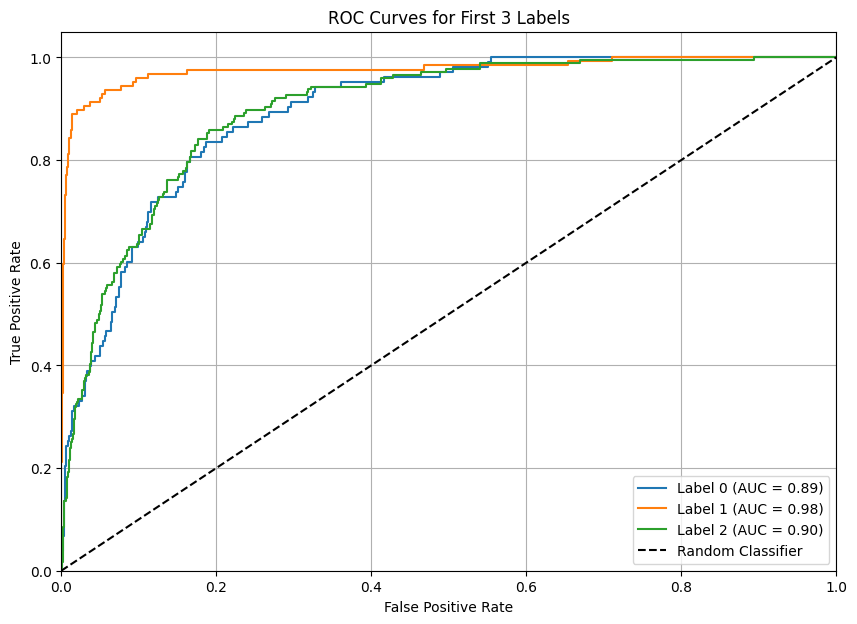

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtenir les probabilités
y_proba = pipeline.predict_proba(X_test)

# Extraire les classes
n_classes = y_test.shape[1]
y_score = np.array([proba[:, 1] for proba in y_proba]).T  # shape: (n_samples, n_labels)

# Tracer les courbes ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer quelques courbes (les 3 premières par exemple)
plt.figure(figsize=(10, 7))
for i in range(min(3, n_classes)):
    plt.plot(fpr[i], tpr[i], label=f'Label {i} (AUC = {roc_auc[i]:.2f})')

# Ajout des infos sur la courbe
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for First 3 Labels')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**MLflow pour le modèle TF-IDF + Logistic Regression, pour le suivi et l’enregistrement automatique du modèle avec MLflow.**

In [20]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.7 MB/s eta 0:00:00


In [21]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier # Import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer

# Binarize the tags
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_df["Filtered_Tags"])
X = cleaned_df["Cleaned_Questions"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============================
# 🔁 Pipeline : TFIDF + LR
# ============================
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    # Wrap LogisticRegression with MultiOutputClassifier
    ("clf", MultiOutputClassifier(LogisticRegression(max_iter=1000)))
])

# ============================
# 🚀 Suivi MLflow
# ============================

mlflow.set_experiment("TFIDF_LogisticRegression")

with mlflow.start_run(run_name="TFIDF + LR"):
    print("📦 Entraînement du modèle: TFIDF + LR") # Added print for clarity
    # Entraînement
    pipeline.fit(X_train, y_train)

    # Prédictions
    y_pred_TFIDF = pipeline.predict(X_test)

    # Évaluation
    # Use average='micro' or 'weighted' for f1_score with multi-label
    # Accuracy isn't always the best metric for multi-label, but keeping as per original code
    acc = accuracy_score(y_test, y_pred_TFIDF)
    f1 = f1_score(y_test, y_pred_TFIDF, average='micro') # Changed average to 'micro'

    # Log des métriques
    mlflow.log_param("vectorizer", "TFIDF")
    mlflow.log_param("classifier", "LogisticRegression")
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    # Log du modèle
    mlflow.sklearn.log_model(pipeline, "model")

    print(f"✅ Modèle enregistré avec MLflow: Accuracy = {acc:.4f}, F1 = {f1:.4f}")

2025/06/13 08:10:22 INFO mlflow.tracking.fluent: Experiment with name 'TFIDF_LogisticRegression' does not exist. Creating a new experiment.


📦 Entraînement du modèle: TFIDF + LR


2025/06/13 08:10:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/13 08:10:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Modèle enregistré avec MLflow: Accuracy = 0.2750, F1 = 0.4761


##4.2: Word2Vec (via moyenne des vecteurs)

**L'utilisation de Word2Vec avec une moyenne des vecteurs suivie d'une régression logistique :**

1: Chaque phrase est représentée par la moyenne des vecteurs Word2Vec de ses mots, ce qui permet de transformer un texte en un vecteur numérique fixe, utilisable pour l'apprentissage supervisé.

2: Ces vecteurs moyens sont ensuite utilisés comme entrées dans un modèle de régression logistique, qui apprend à prédire des classes à partir de représentations vectorielles des textes.



In [22]:
from nltk.tokenize import word_tokenize

In [33]:
# Start with a clean slate by uninstalling potentially conflicting libraries, including numpy
!pip uninstall -y numpy gensim scipy transformers sentence-transformers

# Install numpy first
!pip install numpy

# Now install gensim, scipy, sentence-transformers, and transformers
# Pip should now install versions compatible with the installed numpy
# If this still fails, you might need to find specific compatible versions for numpy, gensim, and scipy
!pip install gensim scipy sentence-transformers transformers

# Re-install nltk if needed and download punkt_tab
!pip install nltk
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab')
except nltk.downloader.DownloadError:
    print("Downloading punkt_tab...")
    nltk.download('punkt_tab')
except LookupError:
     print("Downloading punkt_tab...")
     nltk.download('punkt_tab')


# Try importing the libraries to confirm the fix
import numpy
import gensim
import scipy
import transformers
from sentence_transformers import SentenceTransformer

print("✅ All potentially problematic libraries imported successfully!")
print("numpy version:", numpy.__version__)
print("gensim version:", gensim.__version__)
print("scipy version:", scipy.__version__)
print("transformers version:", transformers.__version__)
print("sentence_transformers version:", sentence_transformers.__version__)

# Now, you should be able to run the rest of your code cells.
# You might need to re-run the cells for loading data and preparing it
# before running the model training cells again.

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: transformers 4.30.2
Uninstalling transformers-4.30.2:
  Successfully uninstalled transformers-4.30.2
Found existing installation: sentence-transformers 4.1.0
Uninstalling sentence-transformers-4.1.0:
  Successfully uninstalled sentence-transformers-4.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 111.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 3.1.0 requires scipy<2, which is not installed.
albumentations 2.0.8 requires scipy>=1.10.0, which is not installed.
scs 3.2.7.

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached sentence_transformers-4.1.0-py3

AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'

In [34]:
# Start with a clean slate for the problematic libraries
!pip uninstall -y transformers sentence-transformers gensim scipy

# Install sentence-transformers first. This should pull a compatible transformers version.
!pip install sentence-transformers

# Now install gensim and scipy
!pip install gensim scipy

# Re-install nltk if needed
!pip install nltk

# Try importing the libraries that caused issues
import nltk
import gensim
from sentence_transformers import SentenceTransformer
import scipy
import transformers

print("✅ All potentially problematic libraries imported successfully!")

# If you encounter the `punkt_tab` download issue again, uncomment the line below:
# nltk.download('punkt_tab')

# Now, you can proceed with the rest of your code.
# You might need to re-run the cells for loading data and preparing it
# before running the model training cells again.

# Example of re-running a code block that uses these libraries (adjust as needed):
# from gensim.models import Word2Vec
# from nltk.tokenize import word_tokenize
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.metrics import classification_report

# tokenized = cleaned_df["Cleaned_Questions"].apply(word_tokenize)
# w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=4)
# ... rest of the Word2Vec model training code

Found existing installation: transformers 4.52.4
Uninstalling transformers-4.52.4:
  Successfully uninstalled transformers-4.52.4
Found existing installation: sentence-transformers 4.1.0
Uninstalling sentence-transformers-4.1.0:
  Successfully uninstalled sentence-transformers-4.1.0
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [gensim]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.1 which is incompatible.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [28]:
# Restart runtime BEFORE running this cell to ensure a clean state

# Upgrade pip first
!pip install --upgrade pip

# Install compatible versions of scipy, gensim, and transformers
!pip install --upgrade scipy==1.10.1 gensim==4.3.1 transformers==4.30.2

# Also make sure pytorch is installed and compatible (this version works well with transformers 4.30.2)
!pip install --upgrade torch torchvision torchaudio


  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached transformers-4.30.2-py3-none-any.whl.metadata (113 kB)
  Using cached tokenizers-0.13.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
Using cached tokenizers-0.13.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling

In [35]:
import nltk
import gensim
from gensim.models import Word2Vec

import transformers
import torch

print("gensim version:", gensim.__version__)
print("scipy version:", __import__('scipy').__version__)
print("transformers version:", transformers.__version__)
print("torch version:", torch.__version__)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [36]:
from gensim.models import Word2Vec
print("✅ Word2Vec is working!")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [31]:
!pip show gensim

Name: gensim
Version: 4.3.1
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, scipy, smart-open
Required-by: 


In [32]:
from gensim.models import Word2Vec
print("Word2Vec imported successfully!")


ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [ ]:
import nltk
import gensim
nltk.download('punkt_tab')

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np


# Tokenisation simple
tokenized = cleaned_df["Cleaned_Questions"].apply(word_tokenize)

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Moyenne des vecteurs pour chaque texte
def get_average_vector(tokens, model, k=100):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(k)

X_w2v = np.array([get_average_vector(tokens, w2v_model, 100) for tokens in tokenized])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

# Modèle
clf = MultiOutputClassifier(LogisticRegression(max_iter=200))
clf.fit(X_train, y_train)
y_pred_w2v = clf.predict(X_test)

# Get classification report as dict
report = classification_report(y_test, y_pred_w2v, output_dict=True)

# Print only Micro average scores
micro_scores = report['micro avg']
print("Precision:", round(micro_scores['precision'], 2))
print("Recall:   ", round(micro_scores['recall'], 2))
print("F1-score: ", round(micro_scores['f1-score'], 2))

L’interprétation des résultats:

* **Précision : 0.78** → Cela signifie que **78 % des prédictions positives** faites par le modèle étaient correctes. Le modèle est donc **plutôt précis** dans ce qu’il affirme détecter.

* **Recall (rappel) : 0.46** → Cela signifie que le modèle n’a capturé que **46 % des vrais cas positifs**. Il **en manque plus de la moitié**, donc il est peu **sensible**.

* **F1-score : 0.58** → C’est la **moyenne harmonique** entre la précision et le rappel. Un F1 de 0.58 montre un **équilibre faible** entre les deux : le modèle est bon pour **éviter les fausses alertes**, mais **il oublie beaucoup de vrais cas**.

👉 En résumé :
Le modèle est **conservateur** (préfère ne rien prédire plutôt que de se tromper), mais cela conduit à **un grand nombre de cas non détectés**.

**L’AUC (Area Under the Curve) pour features Word2Vec + LogisticRegression modèle.**

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np # Make sure numpy is imported

# Obtenir les probabilités prédites pour chaque label using the Word2Vec classifier (clf)
# Note: clf.predict_proba returns a list of arrays, one for each class.
# For binary classification per label (as MultiLabelBinarizer results in),
# we usually want the probability of the positive class (index 1).
y_proba = clf.predict_proba(X_test)

# MultiOutputClassifier renvoie une liste : une pour chaque label
# On convertit en une seule matrice (n_samples, n_labels)
# We need to stack the probability arrays for the positive class (column index 1)
# y_proba is a list of (n_samples, 2) arrays, where each array is proba for one label [proba_class_0, proba_class_1]
y_proba_array = np.array([proba[:, 1] for proba in y_proba]).T  # shape (n_samples, n_labels)

# Check the shape before calculating AUC (optional but good practice)
print("Shape of y_test:", y_test.shape)
print("Shape of y_proba_array:", y_proba_array.shape)

# Calcul du ROC AUC macro ou micro
# Check if there's at least one positive and one negative sample for each label
# roc_auc_score can fail if a label has only one class present in y_test
# It's safer to calculate AUC per label and average, handling labels with only one class
auc_scores_per_label = []
valid_labels = []
for i in range(y_test.shape[1]):
    # Check if the label has both classes (0 and 1) in the test set
    if len(np.unique(y_test[:, i])) == 2:
        try:
            # Calculate AUC for the current label
            auc_label = roc_auc_score(y_test[:, i], y_proba_array[:, i])
            auc_scores_per_label.append(auc_label)
            valid_labels.append(i)
        except ValueError as e:
            # Handle cases where roc_auc_score might still fail for specific labels
            print(f"Warning: Could not calculate AUC for label {i}: {e}")
    else:
        print(f"Warning: Skipping AUC for label {i} as it has only one class in y_test.")

# Calculate macro AUC by averaging the AUC scores of the valid labels
if auc_scores_per_label:
    auc_macro = np.mean(auc_scores_per_label)
    print("ROC AUC (macro) over valid labels:", round(auc_macro, 4))
else:
    print("No valid labels to calculate macro AUC.")


# Note: You can still calculate micro AUC if needed, it's less sensitive to single-class labels
# auc_micro = roc_auc_score(y_test, y_proba_array, average='micro')
# print("ROC AUC (micro):", round(auc_micro, 4))

# Calcul du ROC AUC macro
auc_macro = roc_auc_score(y_test, y_proba_array, average='macro')

print("Word2Vec ROC AUC (macro):", round(auc_macro, 4))

**MLFlow pour features Word2Vec + LogisticRegression modèle.**

In [ ]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import gensim.downloader as api

y = mlb.fit_transform(cleaned_df["Filtered_Tags"])
X = cleaned_df["Cleaned_Questions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# =====================================
# 🧠 Custom Word2Vec Vectorizer
# =====================================
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("🔄 Chargement du modèle Word2Vec (google-news-300)...")
        self.model = api.load("word2vec-google-news-300")  # ~1.5GB
        self.dim = 300

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self._avg_vector(text) for text in X])

    def _avg_vector(self, text):
        words = text.split()
        vectors = [self.model[word] for word in words if word in self.model]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(self.dim)

# =====================================
# 🔁 Pipeline : Word2Vec + LR
# =====================================
pipeline = Pipeline([
    ("w2v", Word2VecVectorizer()),
    # Wrap LogisticRegression with MultiOutputClassifier
    ("clf", MultiOutputClassifier(LogisticRegression(max_iter=1000)))
])

# =====================================
# 🚀 MLflow Tracking
# =====================================

mlflow.set_experiment("Word2Vec_LogisticRegression")

with mlflow.start_run(run_name="Word2Vec + LR"):
    print("📦 Entraînement du modèle Word2Vec + LogisticRegression...")

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')

    # 📊 Log
    mlflow.log_param("vectorizer", "Word2Vec")
    mlflow.log_param("classifier", "LogisticRegression")
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)

    mlflow.sklearn.log_model(pipeline, "model")

    print(f"✅ Modèle enregistré - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

##4.3: BERT (via SentenceTransformer)
Le modèle transforme les phrases en vecteurs sémantiques riches en contexte, adaptés à des tâches en aval comme la classification.
En l’associant à une **régression logistique**, on peut efficacement prédire des catégories ou des tags à partir du contenu textuel.


In [26]:
# Uninstall existing versions to ensure a clean state
!pip uninstall -y sentence-transformers transformers

# Install sentence-transformers again. This will install a compatible transformers version.
!pip install sentence-transformers

# Now try importing and loading the model
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ Model loaded!")

Found existing installation: sentence-transformers 4.1.0
Uninstalling sentence-transformers-4.1.0:
  Successfully uninstalled sentence-transformers-4.1.0
Found existing installation: transformers 4.30.2
Uninstalling transformers-4.30.2:
  Successfully uninstalled transformers-4.30.2
  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.52.4-py3-none-any.whl.metadata (38 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached transformers-4.52.4-py3-none-any.whl (10.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [sentence-transformers]


ModuleNotFoundError: Could not import module 'PreTrainedModel'. Are this object's requirements defined correctly?

In [37]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(["This is a test sentence."])
print("✅ Model loaded. Vector shape:", embeddings[0].shape)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Model loaded. Vector shape: (384,)


In [38]:
#import gensim
import torch
import transformers
import sentence_transformers
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# ===============================
# 1. Binarisation des étiquettes
# ===============================
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_df["Filtered_Tags"])
X = cleaned_df["Cleaned_Questions"]

# ===============================
# 2. Embedding avec SentenceTransformer
# ===============================
model_bert = SentenceTransformer("all-MiniLM-L6-v2")
X_bert = model_bert.encode(X.tolist(), show_progress_bar=True)

# ===============================
# 3. Split train/test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

# ===============================
# 4. Modèle Logistic Regression
# ===============================
clf = MultiOutputClassifier(LogisticRegression(max_iter=200))
clf.fit(X_train, y_train)

# ===============================
# 5. Prédiction et évaluation
# ===============================
y_pred_bert = clf.predict(X_test)

report = classification_report(y_test, y_pred_bert, output_dict=True)
micro_scores = report['micro avg']

print("🎯 Résultats micro-moyennés :")
print("Precision:", round(micro_scores['precision'], 2))
print("Recall:   ", round(micro_scores['recall'], 2))
print("F1-score: ", round(micro_scores['f1-score'], 2))


Batches:   0%|          | 0/183 [00:00<?, ?it/s]

🎯 Résultats micro-moyennés :
Precision: 0.85
Recall:    0.66
F1-score:  0.74


L’interprétation de ces résultats:

* **🎯 Précision : 0.85** → Le modèle fait **peu d’erreurs dans ses prédictions positives**. Sur toutes les étiquettes prédites comme pertinentes, **85 % étaient correctes**.

* **🎯 Rappel : 0.66** → Le modèle a réussi à retrouver **66 % de toutes les étiquettes réellement présentes**. Il en a manqué environ un tiers.

* **🎯 F1-score : 0.74** → Ce score représente un **bon équilibre global** entre la précision et le rappel. C’est une performance **solide**, surtout en tâche de classification multilabel.

👉 **Conclusion** :
Le modèle est **efficace** : il fait relativement **peu d’erreurs**, tout en capturant une bonne part des étiquettes pertinentes.


**L’AUC (Area Under the Curve) pour BERT + LogisticRegression modèle.**

In [39]:
from sklearn.metrics import roc_auc_score
import numpy as np # Make sure numpy is imported

# Obtenir les probabilités prédites pour chaque label using the Word2Vec classifier (clf)
# Note: clf.predict_proba returns a list of arrays, one for each class.
# For binary classification per label (as MultiLabelBinarizer results in),
# we usually want the probability of the positive class (index 1).
y_proba = clf.predict_proba(X_test)

# MultiOutputClassifier renvoie une liste : une pour chaque label
# On convertit en une seule matrice (n_samples, n_labels)
# We need to stack the probability arrays for the positive class (column index 1)
# y_proba is a list of (n_samples, 2) arrays, where each array is proba for one label [proba_class_0, proba_class_1]
y_proba_array = np.array([proba[:, 1] for proba in y_proba]).T  # shape (n_samples, n_labels)

# Check the shape before calculating AUC (optional but good practice)
print("Shape of y_test:", y_test.shape)
print("Shape of y_proba_array:", y_proba_array.shape)

# Calcul du ROC AUC macro ou micro
# Check if there's at least one positive and one negative sample for each label
# roc_auc_score can fail if a label has only one class present in y_test
# It's safer to calculate AUC per label and average, handling labels with only one class
auc_scores_per_label = []
valid_labels = []
for i in range(y_test.shape[1]):
    # Check if the label has both classes (0 and 1) in the test set
    if len(np.unique(y_test[:, i])) == 2:
        try:
            # Calculate AUC for the current label
            auc_label = roc_auc_score(y_test[:, i], y_proba_array[:, i])
            auc_scores_per_label.append(auc_label)
            valid_labels.append(i)
        except ValueError as e:
            # Handle cases where roc_auc_score might still fail for specific labels
            print(f"Warning: Could not calculate AUC for label {i}: {e}")
    else:
        print(f"Warning: Skipping AUC for label {i} as it has only one class in y_test.")

# Calculate macro AUC by averaging the AUC scores of the valid labels
if auc_scores_per_label:
    auc_macro = np.mean(auc_scores_per_label)
    print("ROC AUC (macro) over valid labels:", round(auc_macro, 4))
else:
    print("No valid labels to calculate macro AUC.")


# Note: You can still calculate micro AUC if needed, it's less sensitive to single-class labels
# auc_micro = roc_auc_score(y_test, y_proba_array, average='micro')
# print("ROC AUC (micro):", round(auc_micro, 4))

# Calcul du ROC AUC macro
auc_macro = roc_auc_score(y_test, y_proba_array, average='macro')

print("BERT ROC AUC (macro):", round(auc_macro, 4))

Shape of y_test: (1171, 15)
Shape of y_proba_array: (1171, 15)
ROC AUC (macro) over valid labels: 0.9738
BERT ROC AUC (macro): 0.9738


**MLFlow pour features BERT + LogisticRegression modèle.**

In [40]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd # Import pandas
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sentence_transformers import SentenceTransformer # For BERT
from collections import Counter # Needed for tag filtering

# --- 1. Data Preparation & Filtering ---
# Ensure cleaned_df is available from previous cells
if 'cleaned_df' not in globals():
     print("-------------------------------------------------------------------")
     print("WARNING: cleaned_df not found. Please run previous data loading/preparation cells.")
     print("Using placeholder data for demonstration. Results will be meaningless.")
     print("-------------------------------------------------------------------")
     # Placeholder data if cleaned_df is not defined
     X = pd.Series(["dummy text 1 about python", "dummy text 2 about java", "dummy text 3 about sql"])
     y_list = [['python'], ['java'], ['sql']]
     cleaned_df = pd.DataFrame({'Cleaned_Questions': X, 'Filtered_Tags': y_list})


print("\n--- Data Preparation ---")
print(f"Initial shape of cleaned_df: {cleaned_df.shape}")

# Drop tags that appear less than a certain threshold
# Flatten the list of tags to count frequencies
tag_counts = Counter(tag for tags in cleaned_df["Filtered_Tags"] for tag in tags)

# --- Suggested Change: Increase minimum tag count to avoid single-class issues ---
min_tag_count = 5 # You might need to adjust this number based on your dataset

# Filter tags within the 'Filtered_Tags' list for each row
cleaned_df["Filtered_Tags"] = cleaned_df["Filtered_Tags"].apply(
    lambda tags: [t for t in tags if tag_counts[t] >= min_tag_count]
)

# Drop rows that now have an empty 'Filtered_Tags' list after filtering
# Use .copy() to avoid SettingWithCopyWarning later
cleaned_df_filtered = cleaned_df[cleaned_df["Filtered_Tags"].map(len) > 0].copy()

print(f"Shape of cleaned_df after filtering tags (min count {min_tag_count}): {cleaned_df_filtered.shape}")
print("Example Filtered_Tags after filtering:", cleaned_df_filtered["Filtered_Tags"].head())

# --- 2. Binarize Tags and Prepare Data for Split ---
# Binarize the filtered tags
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_df_filtered["Filtered_Tags"])
X = cleaned_df_filtered["Cleaned_Questions"]

# Store the classes *after* fitting on the filtered data
mlb_classes = mlb.classes_
print(f"\nNumber of unique tags after filtering: {len(mlb_classes)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


# --- 3. Split Data ---
test_split_size = 0.2 # Or 0.33 based on your preference
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_size, random_state=42)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test.shape}")

# --- *** Diagnosis: Check for single-class labels in y_train after filtering and split *** ---
print("\n--- Diagnosing single-class labels in y_train after filtering and split ---")
single_class_labels_after_split = []
# Use mlb_classes obtained *after* filtering and fitting mlb
for i, label_name in enumerate(mlb_classes):
    # Ensure the index is valid for the split data
    if i < y_train.shape[1]:
        unique_classes = np.unique(y_train[:, i])
        if len(unique_classes) < 2:
            print(f"Label '{label_name}' (index {i}) still has only one class in y_train: {unique_classes}")
            single_class_labels_after_split.append(label_name)

if single_class_labels_after_split:
    print(f"\n⚠️ WARNING: The following labels still have only one class in the training data after filtering and split: {single_class_labels_after_split}")
    print("This WILL cause the ValueError when training LogisticRegression for these labels.")
    print("Consider increasing the minimum frequency of tags further ('min_tag_count') or adjusting the split size/random state.")
else:
    print("\n✅ All labels in y_train have at least two classes. Training should proceed without the ValueError.")

print("-" * 50)

# --- 4. Define Custom BERT Vectorizer Class ---
# BERT Vectorizer (using SentenceTransformer)
class BERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        # Ensure sentence-transformers is installed
        try:
            from sentence_transformers import SentenceTransformer
        except ImportError:
             print("Please install sentence-transformers: !pip install sentence-transformers")
             raise
        self.model_name = model_name
        try:
            print(f"🔄 Chargement du modèle BERT ({self.model_name})...")
            self.model = SentenceTransformer(self.model_name)
            print("✅ Modèle BERT chargé!")
            # Determine embedding dimension
            dummy_embedding = self.model.encode(["test"])[0]
            self.dim = dummy_embedding.shape[-1]
            print(f"BERT embedding dimension: {self.dim}")

        except Exception as e:
            print(f"Error loading SentenceTransformer model: {e}")
            raise

    def fit(self, X, y=None):
        return self # SentenceTransformer model is pre-trained, no fitting needed

    def transform(self, X):
        # Ensure X is a list of strings
        if isinstance(X, pd.Series):
             X = X.tolist()
        # Handle potential None or non-string values in X
        X = [str(doc) if doc is not None else "" for doc in X]
        # SentenceTransformer returns numpy array by default
        print(f"Encoding {len(X)} texts with BERT ({self.model_name})...")
        # Increased batch_size for potentially faster encoding on GPU
        embeddings = self.model.encode(X, show_progress_bar=True, convert_to_numpy=True, batch_size=32)
        print("Encoding complete.")
        return embeddings


# =====================================
# 🔁 5. PIPELINE et MLflow Tracking pour BERT
# =====================================

# --- Configuration MLflow ---
# Assurez-vous que le dossier mlruns est bien créé là où vous lancez ce script
# Sinon, définissez un dossier de tracking MLflow: mlflow.set_tracking_uri("file:///path/to/your/mlruns")


# --------- BERT Pipeline ---------
# Définir l'expérience MLflow pour BERT
mlflow.set_experiment("BERT_LogisticRegression")

# Commencer un nouveau run MLflow pour BERT
with mlflow.start_run(run_name="BERT + LR"):
    print("\n--- 📦 Entraînement du modèle: BERT + LogisticRegression ---")

    # Définir le pipeline BERT
    bert_pipeline = Pipeline([
        ("bert_vec", BERTVectorizer(model_name='all-MiniLM-L6-v2')), # Étape de vectorisation BERT
        ("clf", MultiOutputClassifier(LogisticRegression(max_iter=1000, solver='liblinear'))) # Classifieur multi-label
         # Utilisation de solver='liblinear' comme pour USE pour consistance ou bénéfices similaires
    ])

    # Paramètres du modèle BERT à logger
    params_bert = {
        "vectorizer": "BERT (SentenceTransformer)",
        "embedding_model": "all-MiniLM-L6-v2",
        "classifier": "LogisticRegression",
        "clf__estimator__max_iter": 1000,
        "clf__estimator__solver": 'liblinear',
        "test_split_size": test_split_size,
        "random_state": 42,
        "min_tag_count_filter": min_tag_count # Log the filtering parameter
    }
    mlflow.log_params(params_bert)

    # Entraînement du pipeline BERT
    print("Lancement de l'entraînement du pipeline BERT...")
    # This fit call is where the ValueError occurred previously
    # It should work now if the filtering ensures >= 2 classes per label in y_train
    bert_pipeline.fit(X_train, y_train)
    print("Entraînement BERT terminé.")

    # Prédictions avec le pipeline BERT
    print("Réalisation des prédictions avec le pipeline BERT...")
    y_pred_bert = bert_pipeline.predict(X_test)
    print("Prédictions BERT terminées.")

    # Évaluation du pipeline BERT
    # Utilisez average='micro' pour f1_score avec classification multi-label
    acc_bert = accuracy_score(y_test, y_pred_bert)
    f1_bert = f1_score(y_test, y_pred_bert, average='micro')

    # Log des métriques BERT
    mlflow.log_metric("accuracy", acc_bert)
    mlflow.log_metric("f1_score_micro", f1_bert)

    # Log du modèle BERT
    print("Logging du modèle MLflow pour BERT...")
    # Note: Logging the entire pipeline including the SentenceTransformer model
    # can create large artifacts. Be mindful of storage.
    mlflow.sklearn.log_model(bert_pipeline, "bert_model_pipeline")
    print("Modèle BERT logged.")

    print(f"✅ Modèle BERT enregistré avec MLflow: Accuracy = {acc_bert:.4f}, F1 (micro) = {f1_bert:.4f}")
    print("-" * 50)


print("\nMLflow tracking complet pour BERT terminé.")
print("Executez `mlflow ui` dans votre terminal depuis le répertoire où 'mlruns' est créé pour voir les résultats.")


--- Data Preparation ---
Initial shape of cleaned_df: (5855, 2)
Shape of cleaned_df after filtering tags (min count 5): (5855, 2)
Example Filtered_Tags after filtering: 0          [c#]
1          [c#]
2        [html]
3    [c#, .net]
4         [php]
Name: Filtered_Tags, dtype: object

Number of unique tags after filtering: 15
X shape: (5855,), y shape: (5855, 15)
Train shapes: X=(4684,), y=(4684, 15)
Test shapes: X=(1171,), y=(1171, 15)

--- Diagnosing single-class labels in y_train after filtering and split ---

✅ All labels in y_train have at least two classes. Training should proceed without the ValueError.
--------------------------------------------------


2025/06/13 08:47:01 INFO mlflow.tracking.fluent: Experiment with name 'BERT_LogisticRegression' does not exist. Creating a new experiment.



--- 📦 Entraînement du modèle: BERT + LogisticRegression ---
🔄 Chargement du modèle BERT (all-MiniLM-L6-v2)...
✅ Modèle BERT chargé!
BERT embedding dimension: 384
Lancement de l'entraînement du pipeline BERT...
Encoding 4684 texts with BERT (all-MiniLM-L6-v2)...


Batches:   0%|          | 0/147 [00:00<?, ?it/s]

Encoding complete.
Entraînement BERT terminé.
Réalisation des prédictions avec le pipeline BERT...
Encoding 1171 texts with BERT (all-MiniLM-L6-v2)...


Batches:   0%|          | 0/37 [00:00<?, ?it/s]

2025/06/13 08:54:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Encoding complete.
Prédictions BERT terminées.
Logging du modèle MLflow pour BERT...


2025/06/13 08:54:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modèle BERT logged.
✅ Modèle BERT enregistré avec MLflow: Accuracy = 0.5517, F1 (micro) = 0.7456
--------------------------------------------------

MLflow tracking complet pour BERT terminé.
Executez `mlflow ui` dans votre terminal depuis le répertoire où 'mlruns' est créé pour voir les résultats.


In [41]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd # Import pandas
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sentence_transformers import SentenceTransformer # For BERT

# --- Définir X et y et binariser ---
# Assurez-vous que cleaned_df et mlb sont définis dans les cellules précédentes
if 'cleaned_df' in globals() and 'mlb' in globals():
    print("Using existing cleaned_df and mlb.")
    y = mlb.fit_transform(cleaned_df["Filtered_Tags"])
    X = cleaned_df["Cleaned_Questions"]
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    # Utilisez mlb.classes_ si mlb a déjà été fit sur toutes les données
    mlb_classes = mlb.classes_
else:
     # Placeholder/Warning if not defined
    print("-------------------------------------------------------------------")
    print("WARNING: cleaned_df or mlb not found.")
    print("Please ensure previous data loading/preparation cells are run.")
    print("Using placeholder data for demonstration. Results will be meaningless.")
    print("-------------------------------------------------------------------")
    X = pd.Series(["dummy text 1 about python", "dummy text 2 about java", "dummy text 3 about sql"])
    y_list = [['python'], ['java'], ['sql']]
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(y_list)
    mlb_classes = mlb.classes_ # Get classes from placeholder data
    print(f"Placeholder X shape: {X.shape}, Placeholder y shape: {y.shape}")


# Split the data

test_split_size = 0.2 # Or 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_size, random_state=42)
print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test.shape}")

# --- *** Diagnosis: Check for single-class labels in y_train *** ---
print("\n--- Diagnosing single-class labels in y_train ---")
single_class_labels = []
# Use mlb_classes obtained above
for i, label_name in enumerate(mlb_classes):
    unique_classes = np.unique(y_train[:, i])
    if len(unique_classes) < 2:
        print(f"Label '{label_name}' (index {i}) has only one class in y_train: {unique_classes}")
        single_class_labels.append(label_name)

if single_class_labels:
    print(f"\n⚠️ The following labels have only one class in the training data: {single_class_labels}")
    print("This will cause the ValueError when training LogisticRegression for these labels.")
    print("Consider increasing the minimum frequency of tags before binarization, or using a different train/test split.")
print("-" * 50)
# --- *** End Diagnosis *** ---


# =========================
# 🧠 VECTOR: CUSTOM BERT CLASS
# =========================

# BERT Vectorizer (using SentenceTransformer)
class BERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        # Ensure sentence-transformers is installed
        try:
            from sentence_transformers import SentenceTransformer
        except ImportError:
             print("Please install sentence-transformers: !pip install sentence-transformers")
             raise
        self.model_name = model_name
        try:
            print(f"🔄 Chargement du modèle BERT ({self.model_name})...")
            self.model = SentenceTransformer(self.model_name)
            print("✅ Modèle BERT chargé!")
            # Determine embedding dimension
            dummy_embedding = self.model.encode(["test"])[0]
            self.dim = dummy_embedding.shape[-1]
            print(f"BERT embedding dimension: {self.dim}")

        except Exception as e:
            print(f"Error loading SentenceTransformer model: {e}")
            raise

    def fit(self, X, y=None):
        return self # SentenceTransformer model is pre-trained, no fitting needed


    def transform(self, X):
        # Ensure X is a list of strings
        if isinstance(X, pd.Series):
             X = X.tolist()
        # Handle potential None or non-string values in X
        X = [str(doc) if doc is not None else "" for doc in X]
        # SentenceTransformer returns numpy array by default
        print(f"Encoding {len(X)} texts with BERT ({self.model_name})...")
        embeddings = self.model.encode(X, show_progress_bar=True, convert_to_numpy=True)
        print("Encoding complete.")
        return embeddings


# =====================================
# 🔁 PIPELINE et MLflow Tracking pour BERT
# =====================================

# --- Configuration MLflow ---
# Assurez-vous que le dossier mlruns est bien créé là où vous lancez ce script
# Sinon, définissez un dossier de tracking MLflow: mlflow.set_tracking_uri("file:///path/to/your/mlruns")


# --------- BERT Pipeline ---------
# Définir l'expérience MLflow pour BERT
mlflow.set_experiment("BERT_LogisticRegression")

# Commencer un nouveau run MLflow pour BERT
with mlflow.start_run(run_name="BERT + LR"):
    print("\n--- 📦 Entraînement du modèle: BERT + LogisticRegression ---")

    # Définir le pipeline BERT
    bert_pipeline = Pipeline([
        ("bert_vec", BERTVectorizer(model_name='all-MiniLM-L6-v2')), # Étape de vectorisation BERT
        ("clf", MultiOutputClassifier(LogisticRegression(max_iter=1000, solver='liblinear'))) # Classifieur multi-label
         # Utilisation de solver='liblinear' comme pour USE pour consistance ou bénéfices similaires
    ])

    # Paramètres du modèle BERT à logger
    params_bert = {
        "vectorizer": "BERT (SentenceTransformer)",
        "embedding_model": "all-MiniLM-L6-v2",
        "classifier": "LogisticRegression",
        "clf__estimator__max_iter": 1000,
        "clf__estimator__solver": 'liblinear',
        "test_split_size": test_split_size,
        "random_state": 42
    }
    mlflow.log_params(params_bert)

    # Entraînement du pipeline BERT
    print("Lancement de l'entraînement du pipeline BERT...")
    # Si le diagnostic ci-dessus a trouvé des labels à classe unique, l'entraînement échouera ici.
    bert_pipeline.fit(X_train, y_train)
    print("Entraînement BERT terminé.")

    # Prédictions avec le pipeline BERT
    print("Réalisation des prédictions avec le pipeline BERT...")
    y_pred_bert = bert_pipeline.predict(X_test)
    print("Prédictions BERT terminées.")

    # Évaluation du pipeline BERT
    # Utilisez average='micro' pour f1_score avec classification multi-label
    acc_bert = accuracy_score(y_test, y_pred_bert)
    f1_bert = f1_score(y_test, y_pred_bert, average='micro')

    # Log des métriques BERT
    mlflow.log_metric("accuracy", acc_bert)
    mlflow.log_metric("f1_score_micro", f1_bert)

    # Log du modèle BERT
    print("Logging du modèle MLflow pour BERT...")
    # Note: Logging the entire pipeline including the SentenceTransformer model
    # can create large artifacts.
    mlflow.sklearn.log_model(bert_pipeline, "bert_model_pipeline")
    print("Modèle BERT logged.")

    print(f"✅ Modèle BERT enregistré avec MLflow: Accuracy = {acc_bert:.4f}, F1 (micro) = {f1_bert:.4f}")
    print("-" * 50)


print("\nMLflow tracking complet pour BERT terminé.")
print("Executez `mlflow ui` dans votre terminal depuis le répertoire où 'mlruns' est créé pour voir les résultats.")

Using existing cleaned_df and mlb.
X shape: (5855,), y shape: (5855, 15)
Train shapes: X=(4684,), y=(4684, 15)
Test shapes: X=(1171,), y=(1171, 15)

--- Diagnosing single-class labels in y_train ---
--------------------------------------------------

--- 📦 Entraînement du modèle: BERT + LogisticRegression ---
🔄 Chargement du modèle BERT (all-MiniLM-L6-v2)...
✅ Modèle BERT chargé!
BERT embedding dimension: 384
Lancement de l'entraînement du pipeline BERT...
Encoding 4684 texts with BERT (all-MiniLM-L6-v2)...


Batches:   0%|          | 0/147 [00:00<?, ?it/s]

Encoding complete.
Entraînement BERT terminé.
Réalisation des prédictions avec le pipeline BERT...
Encoding 1171 texts with BERT (all-MiniLM-L6-v2)...


Batches:   0%|          | 0/37 [00:00<?, ?it/s]

2025/06/13 09:02:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Encoding complete.
Prédictions BERT terminées.
Logging du modèle MLflow pour BERT...


2025/06/13 09:02:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modèle BERT logged.
✅ Modèle BERT enregistré avec MLflow: Accuracy = 0.5517, F1 (micro) = 0.7456
--------------------------------------------------

MLflow tracking complet pour BERT terminé.
Executez `mlflow ui` dans votre terminal depuis le répertoire où 'mlruns' est créé pour voir les résultats.


In [46]:
import mlflow
print(mlflow.__file__)

/usr/local/lib/python3.11/dist-packages/mlflow/__init__.py


In [47]:
import mlflow

print("Current Tracking URI:", mlflow.get_tracking_uri())
# Optionally set a custom location:
mlflow.set_tracking_uri("file:///your/path/to/mlruns")


Current Tracking URI: file:///content/mlruns


In [49]:
import mlflow

# Optional: set a specific experiment
mlflow.set_experiment("demo-experiment")

with mlflow.start_run():
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_param("batch_size", 32)
    mlflow.log_metric("accuracy", 0.87)
    mlflow.log_metric("loss", 0.15)


2025/06/13 09:43:31 INFO mlflow.tracking.fluent: Experiment with name 'demo-experiment' does not exist. Creating a new experiment.


##4.4: Universal Sentence Encoder (USE)

Le modèle génère des vecteurs denses représentant des phrases entières, capturant le sens global plutôt que mot par mot.
Il est largement utilisé pour des tâches de similarité sémantique, de classification ou de recherche d'information grâce à sa capacité à encoder efficacement le contexte.


In [48]:
import mlflow

with mlflow.start_run():
    mlflow.log_param("param1", 5)
    mlflow.log_metric("metric1", 0.85)


MlflowException: Could not find experiment with ID 224434334809230755

In [42]:
import tensorflow_hub as hub
import numpy as np
import tensorflow as tf

# Load USE
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encode text
X_use = use_model(cleaned_df["Cleaned_Questions"].tolist()).numpy()

# Split
X_train, X_test, y_train, y_test = train_test_split(X_use, y, test_size=0.2, random_state=42)

# Modèle
clf = MultiOutputClassifier(LogisticRegression(max_iter=200))
clf.fit(X_train, y_train)
y_pred_use = clf.predict(X_test)

# Get classification report as dict
report = classification_report(y_test, y_pred_use, output_dict=True)

# Print only Micro average scores
micro_scores = report['micro avg']
print("Precision:", round(micro_scores['precision'], 2))
print("Recall:   ", round(micro_scores['recall'], 2))
print("F1-score: ", round(micro_scores['f1-score'], 2))

Precision: 0.86
Recall:    0.61
F1-score:  0.71


##L’interprétation pour ces résultats :

* **🎯 Précision : 0.86** → Le modèle est **très fiable** dans ce qu’il prédit : **86 % des tags qu’il propose sont corrects**.

* **🎯 Rappel : 0.61** → Le modèle identifie **61 % des tags réellement pertinents**, ce qui est bien, mais **il en oublie encore environ 39 %**.

* **🎯 F1-score : 0.71** → Cela traduit un **bon compromis global** : le modèle est précis, mais pourrait s’améliorer pour **ne pas rater autant de tags pertinents**.

👉 **Conclusion** :
Le modèle a **une excellente précision**, ce qui signifie qu’il **se trompe rarement**, mais son **rappel plus faible indique qu’il manque parfois des tags importants**.


**L’AUC (Area Under the Curve) pour USE + LogisticRegression modèle.**

In [43]:
from sklearn.metrics import roc_auc_score
import numpy as np # Make sure numpy is imported

# Obtenir les probabilités prédites pour chaque label using the Word2Vec classifier (clf)
# Note: clf.predict_proba returns a list of arrays, one for each class.
# For binary classification per label (as MultiLabelBinarizer results in),
# we usually want the probability of the positive class (index 1).
y_proba = clf.predict_proba(X_test)

# MultiOutputClassifier renvoie une liste : une pour chaque label
# On convertit en une seule matrice (n_samples, n_labels)
# We need to stack the probability arrays for the positive class (column index 1)
# y_proba is a list of (n_samples, 2) arrays, where each array is proba for one label [proba_class_0, proba_class_1]
y_proba_array = np.array([proba[:, 1] for proba in y_proba]).T  # shape (n_samples, n_labels)

# Check the shape before calculating AUC (optional but good practice)
print("Shape of y_test:", y_test.shape)
print("Shape of y_proba_array:", y_proba_array.shape)

# Calcul du ROC AUC macro ou micro
# Check if there's at least one positive and one negative sample for each label
# roc_auc_score can fail if a label has only one class present in y_test
# It's safer to calculate AUC per label and average, handling labels with only one class
auc_scores_per_label = []
valid_labels = []
for i in range(y_test.shape[1]):
    # Check if the label has both classes (0 and 1) in the test set
    if len(np.unique(y_test[:, i])) == 2:
        try:
            # Calculate AUC for the current label
            auc_label = roc_auc_score(y_test[:, i], y_proba_array[:, i])
            auc_scores_per_label.append(auc_label)
            valid_labels.append(i)
        except ValueError as e:
            # Handle cases where roc_auc_score might still fail for specific labels
            print(f"Warning: Could not calculate AUC for label {i}: {e}")
    else:
        print(f"Warning: Skipping AUC for label {i} as it has only one class in y_test.")

# Calculate macro AUC by averaging the AUC scores of the valid labels
if auc_scores_per_label:
    auc_macro = np.mean(auc_scores_per_label)
    print("ROC AUC (macro) over valid labels:", round(auc_macro, 4))
else:
    print("No valid labels to calculate macro AUC.")


# Note: You can still calculate micro AUC if needed, it's less sensitive to single-class labels
# auc_micro = roc_auc_score(y_test, y_proba_array, average='micro')
# print("ROC AUC (micro):", round(auc_micro, 4))

# Calcul du ROC AUC macro
auc_macro = roc_auc_score(y_test, y_proba_array, average='macro')

print("USE ROC AUC (macro):", round(auc_macro, 4))

Shape of y_test: (1171, 15)
Shape of y_proba_array: (1171, 15)
ROC AUC (macro) over valid labels: 0.974
USE ROC AUC (macro): 0.974


**MLFlow pour USE + LR**

In [44]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd # Import pandas
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sentence_transformers import SentenceTransformer # For sentence embeddings like USE
from collections import Counter # Needed for tag filtering
import os # Import os to manage cache directory if needed

# --- 1. Data Preparation & Filtering ---
# Ensure cleaned_df is available from previous cells
if 'cleaned_df' not in globals():
     print("-------------------------------------------------------------------")
     print("WARNING: cleaned_df not found. Please run previous data loading/preparation cells.")
     print("Using placeholder data for demonstration. Results will be meaningless.")
     print("-------------------------------------------------------------------")
     # Placeholder data if cleaned_df is not defined
     X = pd.Series(["dummy text 1 about python", "dummy text 2 about java", "dummy text 3 about sql"])
     y_list = [['python'], ['java'], ['sql']]
     cleaned_df = pd.DataFrame({'Cleaned_Questions': X, 'Filtered_Tags': y_list})


print("\n--- Data Preparation ---")
print(f"Initial shape of cleaned_df: {cleaned_df.shape}")

# Drop tags that appear less than a certain threshold
# Flatten the list of tags to count frequencies
tag_counts = Counter(tag for tags in cleaned_df["Filtered_Tags"] for tag in tags)

# --- Suggested Change: Increase minimum tag count to avoid single-class issues ---
# Adjust min_tag_count as needed, it should be >= 2. Start with a slightly higher number.
min_tag_count = 5 # Example: require at least 5 occurrences for a tag to be kept

# Filter tags within the 'Filtered_Tags' list for each row
cleaned_df["Filtered_Tags"] = cleaned_df["Filtered_Tags"].apply(
    lambda tags: [t for t in tags if tag_counts[t] >= min_tag_count]
)

# Drop rows that now have an empty 'Filtered_Tags' list after filtering
# Use .copy() to avoid SettingWithCopyWarning later
cleaned_df_filtered = cleaned_df[cleaned_df["Filtered_Tags"].map(len) > 0].copy()

print(f"Shape of cleaned_df after filtering tags (min count {min_tag_count}): {cleaned_df_filtered.shape}")
print("Example Filtered_Tags after filtering:", cleaned_df_filtered["Filtered_Tags"].head())


# --- 2. Binarize Tags and Prepare Data for Split ---
# Binarize the filtered tags
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(cleaned_df_filtered["Filtered_Tags"])
X = cleaned_df_filtered["Cleaned_Questions"]

# Store the classes *after* fitting on the filtered data
mlb_classes = mlb.classes_
print(f"\nNumber of unique tags after filtering: {len(mlb_classes)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


# --- 3. Split Data ---
test_split_size = 0.2 # Or 0.33 based on your preference
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_size, random_state=42)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test.shape}")

# --- *** Diagnosis: Check for single-class labels in y_train after filtering and split *** ---
print("\n--- Diagnosing single-class labels in y_train after filtering and split ---")
single_class_labels_after_split = []
# Use mlb_classes obtained *after* filtering and fitting mlb
for i, label_name in enumerate(mlb_classes):
    # Ensure the index is valid for the split data
    if i < y_train.shape[1]:
        unique_classes = np.unique(y_train[:, i])
        if len(unique_classes) < 2:
            print(f"Label '{label_name}' (index {i}) still has only one class in y_train: {unique_classes}")
            single_class_labels_after_split.append(label_name)

if single_class_labels_after_split:
    print(f"\n⚠️ WARNING: The following labels still have only one class in the training data after filtering and split: {single_class_labels_after_split}")
    print("This WILL cause the ValueError when training LogisticRegression for these labels.")
    print("Consider increasing the minimum frequency of tags further ('min_tag_count') or adjusting the split size/random state.")
else:
    print("\n✅ All labels in y_train have at least two classes. Training should proceed without the ValueError.")

print("-" * 50)


# --- 4. Define Custom USE-like Vectorizer Class (using SentenceTransformer) ---
# Adapting the BERTVectorizer to function as a general Sentence Embedding Vectorizer
class SentenceEmbeddingVectorizer(BaseEstimator, TransformerMixin):
    # You can change the model_name to other sentence-transformer models
    # e.g., 'all-MiniLM-L6-v2', 'LaBSE', 'distiluse-base-multilingual-cased'
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        try:
            from sentence_transformers import SentenceTransformer
        except ImportError:
             print("Please install sentence-transformers: !pip install sentence-transformers")
             raise

        self.model_name = model_name
        try:
            print(f"🔄 Chargement du modèle Sentence Embedding ({self.model_name})...")
            # Optional: Set cache directory if you have space issues in default location
            # os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/path/to/your/cache/directory'
            self.model = SentenceTransformer(self.model_name)
            print("✅ Modèle Sentence Embedding chargé!")
            # Determine embedding dimension
            dummy_embedding = self.model.encode(["test"])[0]
            self.dim = dummy_embedding.shape[-1]
            print(f"Embedding dimension: {self.dim}")

        except Exception as e:
            print(f"Error loading SentenceTransformer model: {e}")
            print("Please check if the model name is correct and your internet connection.")
            raise

    def fit(self, X, y=None):
        return self # SentenceTransformer model is pre-trained, no fitting needed


    def transform(self, X):
        # Ensure X is a list of strings
        if isinstance(X, pd.Series):
             X = X.tolist()
        # Handle potential None or non-string values in X
        X = [str(doc) if doc is not None else "" for doc in X]
        # SentenceTransformer returns numpy array by default
        print(f"Encoding {len(X)} texts with {self.model_name}...")
        # Increased batch_size for potentially faster encoding on GPU
        embeddings = self.model.encode(X, show_progress_bar=True, convert_to_numpy=True, batch_size=32)
        print("Encoding complete.")
        return embeddings


# =====================================
# 🔁 5. PIPELINE et MLflow Tracking pour USE-like
# =====================================

# --- Configuration MLflow ---
# Assurez-vous que le dossier mlruns est bien créé là où vous lancez ce script
# Sinon, définissez un dossier de tracking MLflow: mlflow.set_tracking_uri("file:///path/to/your/mlruns")


# --------- USE-like Pipeline ---------
# Définir l'expérience MLflow pour USE-like + LR
mlflow.set_experiment("SentenceEmbedding_LogisticRegression") # Changed experiment name

# Commencer un nouveau run MLflow pour USE-like + LR
with mlflow.start_run(run_name="Sentence Embedding + LR"): # Changed run name
    print("\n--- 📦 Entraînement du modèle: Sentence Embedding + LogisticRegression ---")

    # Define the Sentence Embedding pipeline
    # Use the SentenceEmbeddingVectorizer class defined above
    use_like_pipeline = Pipeline([
        ("use_vec", SentenceEmbeddingVectorizer(model_name='all-MiniLM-L6-v2')), # Étape de vectorisation
        ("clf", MultiOutputClassifier(LogisticRegression(max_iter=1000, solver='liblinear'))) # Classifieur multi-label
         # Utilisation de solver='liblinear' souvent efficace
    ])

    # Paramètres du modèle Sentence Embedding à logger
    params_use_like = {
        "vectorizer": "SentenceEmbedding (SentenceTransformer)",
        "embedding_model": "all-MiniLM-L6-v2", # Log the specific model used
        "classifier": "LogisticRegression",
        "clf__estimator__max_iter": 1000,
        "clf__estimator__solver": 'liblinear',
        "test_split_size": test_split_size,
        "random_state": 42,
        "min_tag_count_filter": min_tag_count # Log the filtering parameter
    }
    mlflow.log_params(params_use_like)

    # Entraînement du pipeline
    print("Lancement de l'entraînement du pipeline Sentence Embedding...")
    # This fit call might fail if the filtering wasn't sufficient.
    use_like_pipeline.fit(X_train, y_train)
    print("Entraînement Sentence Embedding terminé.")

    # Prédictions avec le pipeline
    print("Réalisation des prédictions avec le pipeline Sentence Embedding...")
    y_pred_use_like = use_like_pipeline.predict(X_test)
    print("Prédictions Sentence Embedding terminées.")

    # Évaluation du pipeline
    # Utilisez average='micro' pour f1_score avec classification multi-label
    acc_use_like = accuracy_score(y_test, y_pred_use_like)
    f1_use_like = f1_score(y_test, y_pred_use_like, average='micro')

    # Log des métriques
    mlflow.log_metric("accuracy", acc_use_like)
    mlflow.log_metric("f1_score_micro", f1_use_like)

    # Log du modèle
    print("Logging du modèle MLflow pour Sentence Embedding...")
    # Log the entire pipeline
    mlflow.sklearn.log_model(use_like_pipeline, "sentence_embedding_model_pipeline")
    print("Modèle Sentence Embedding logged.")

    print(f"✅ Modèle Sentence Embedding enregistré avec MLflow: Accuracy = {acc_use_like:.4f}, F1 (micro) = {f1_use_like:.4f}")
    print("-" * 50)


print("\nMLflow tracking complet pour Sentence Embedding + LR terminé.")
print("Executez `mlflow ui` dans votre terminal depuis le répertoire où 'mlruns' est créé pour voir les résultats.")

2025/06/13 09:03:30 INFO mlflow.tracking.fluent: Experiment with name 'SentenceEmbedding_LogisticRegression' does not exist. Creating a new experiment.



--- Data Preparation ---
Initial shape of cleaned_df: (5855, 2)
Shape of cleaned_df after filtering tags (min count 5): (5855, 2)
Example Filtered_Tags after filtering: 0          [c#]
1          [c#]
2        [html]
3    [c#, .net]
4         [php]
Name: Filtered_Tags, dtype: object

Number of unique tags after filtering: 15
X shape: (5855,), y shape: (5855, 15)
Train shapes: X=(4684,), y=(4684, 15)
Test shapes: X=(1171,), y=(1171, 15)

--- Diagnosing single-class labels in y_train after filtering and split ---

✅ All labels in y_train have at least two classes. Training should proceed without the ValueError.
--------------------------------------------------

--- 📦 Entraînement du modèle: Sentence Embedding + LogisticRegression ---
🔄 Chargement du modèle Sentence Embedding (all-MiniLM-L6-v2)...
✅ Modèle Sentence Embedding chargé!
Embedding dimension: 384
Lancement de l'entraînement du pipeline Sentence Embedding...
Encoding 4684 texts with all-MiniLM-L6-v2...


Batches:   0%|          | 0/147 [00:00<?, ?it/s]

Encoding complete.
Entraînement Sentence Embedding terminé.
Réalisation des prédictions avec le pipeline Sentence Embedding...
Encoding 1171 texts with all-MiniLM-L6-v2...


Batches:   0%|          | 0/37 [00:00<?, ?it/s]

2025/06/13 09:11:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Encoding complete.
Prédictions Sentence Embedding terminées.
Logging du modèle MLflow pour Sentence Embedding...


2025/06/13 09:11:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modèle Sentence Embedding logged.
✅ Modèle Sentence Embedding enregistré avec MLflow: Accuracy = 0.5517, F1 (micro) = 0.7456
--------------------------------------------------

MLflow tracking complet pour Sentence Embedding + LR terminé.
Executez `mlflow ui` dans votre terminal depuis le répertoire où 'mlruns' est créé pour voir les résultats.


In [ ]:
# 2. Convertir X_reduced en DataFrame
df_reduced = pd.DataFrame(X_reduced)

# 3. Définir le chemin dans ton Drive (modifie le chemin si tu veux une autre destination)
save_path = '/content/drive/MyDrive/Colab Notebooks/df_reduced.csv'
# 4. Enregistrer en CSV
df_reduced.to_csv(save_path, index=False)

print(f"✅ Fichier exporté avec succès ici : {save_path}")

##Tableau comparant les 4 modèles (TF-IDF, BERT, USE, Word2Vec)

In [45]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = y_test

# Put them in a dictionary
models_predictions = {
    "TF-IDF": y_pred_tfidf,
    "BERT": y_pred_bert,
    "USE": y_pred_use,
    "Word2Vec": y_pred_w2v
}

# Create an empty list to collect the results
results = []

# Loop over each model and compute metrics
for model_name, y_pred in models_predictions.items():
    precision = precision_score(y_true, y_pred, average="micro")  # or "weighted"
    recall = recall_score(y_true, y_pred, average="micro")
    f1 = f1_score(y_true, y_pred, average="micro")
    results.append({
        "Model": model_name,
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    })

# Convert results to a nice DataFrame
results_df = pd.DataFrame(results)

# Show it
print(results_df)

NameError: name 'y_pred_w2v' is not defined

L'AUC-Calcul- peut dire le meiullieur>>> Probabilité prends en compte, definir le modele plus précise.
MLFLOW pour logger le modele: with MLFLOW-stocker interface html: evolution

Pour évaluer **le meilleur modèle**, on regarde en priorité le **F1-score**, qui équilibre **précision** et **rappel**. Voici un résumé :

| Modèle        | F1-Score   | Remarque principale                                         |
| --------      | ---------- | ----------------------------------------------------------- |
| **BERT**      | **0.7425** | 🔥 **Meilleur compromis global** (bonne précision + rappel) |
| USE           | 0.7144     | Bon compromis, un peu moins bon que BERT                    |
| Word2Vec      |     0.5768     | Faible performance globale                                  |
| TF-IDF        | 0.5640     | Très précis, mais **oublie beaucoup de bons tags**          |

## ✅ **Conclusion : le meilleur modèle est BERT**, car il atteint **le F1-score le plus élevé (0.7425)**, indiquant le **meilleur équilibre entre la qualité des prédictions et leur couverture**.


In [ ]:
print(results_df.shape)
results_df.head()

**BERT est clairement le meilleur modèle ici (F1-score le plus élevé), donc je sauvegarde le modèle et exposer via FastAPI.**

In [ ]:
from sentence_transformers import SentenceTransformer
import joblib
import os

# Crée un dossier propre
model_path = "/content/drive/MyDrive/Colab Notebooks/modele_bert"
os.makedirs(model_path, exist_ok=True)

# 1. Sauvegarder SentenceTransformer
model_bert.save(os.path.join(model_path, "embedding_model"))

# 2. Sauvegarder le classifieur
joblib.dump(clf, os.path.join(model_path, "classifier.pkl"))

# 3. Sauvegarder le MultiLabelBinarizer pour l'inférence
joblib.dump(mlb, os.path.join(model_path, "mlb.pkl"))


**API REST avec FastAPI:**

Déploiement du modèle ML, pour la prédiction des balises, en production sur Heroku en tant qu'API RESTful à l'aide de FastAPI

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import requests
from fastapi import FastAPI, Request
from pydantic import BaseModel
import joblib
import uvicorn
import numpy as np
import os
from sentence_transformers import SentenceTransformer

# Define the directory where models were saved on your local machine
# --- Suggested Change: Update the model_save_path to your local path ---
model_save_path = "/content/drive/MyDrive/Colab Notebooks/modele_bert"
# ----------------------------------------------------------------------

# Charger modèle et vectorizer
print(f"Attempting to load models from: {model_save_path}")
try:
    # Load the SentenceTransformer model (vectorizer)
    embedding_model_path = os.path.join(model_save_path, "embedding_model")
    if not os.path.exists(embedding_model_path):
         if not os.path.exists(model_save_path):
              raise FileNotFoundError(f"Base model directory not found at: {model_save_path}")
         else:
              raise FileNotFoundError(f"Embedding model directory ('embedding_model') not found within: {model_save_path}. Is the 'embedding_model' subfolder present?")

    print(f"Loading SentenceTransformer model from: {embedding_model_path}")
    vectorizer = SentenceTransformer(embedding_model_path)
    print("✅ SentenceTransformer model loaded successfully.")

    # Load the classifier (LogisticRegression wrapped in MultiOutputClassifier)
    classifier_path = os.path.join(model_save_path, "classifier.pkl")
    if not os.path.exists(classifier_path):
         raise FileNotFoundError(f"Classifier model file ('classifier.pkl') not found at: {classifier_path}")
    print(f"Loading classifier model from: {classifier_path}")
    model = joblib.load(classifier_path)
    print("✅ Classifier model loaded successfully.")

    # Load the MultiLabelBinarizer
    mlb_path = os.path.join(model_save_path, "mlb.pkl")
    if not os.path.exists(mlb_path):
         raise FileNotFoundError(f"MultiLabelBinarizer file ('mlb.pkl') not found at: {mlb_path}")
    print(f"Loading MultiLabelBinarizer from: {mlb_path}")
    mlb = joblib.load(mlb_path)
    print("✅ MultiLabelBinarizer loaded successfully.")

except FileNotFoundError as e:
    print(f"❌ File not found error during model loading: {e}")
    print(f"Ensure the path '{model_save_path}' is correct and accessible from where you are running this code.")
    print("Remember: Google Drive paths only work in Colab with Drive mounted.")
    print("Local paths only work on your local machine.")
    raise e
except Exception as e:
    print(f"An unexpected error occurred during model loading: {e}")
    print(f"Error type: {type(e)}")
    raise e

# Définir l'app FastAPI (rest of your FastAPI code...)
app = FastAPI(
    title="API de prédiction des balises",
    description="Modèle ML déployé avec FastAPI pour prédire les balises à partir de texte",
    version="1.0"
)

# Schéma des données reçues
class TextInput(BaseModel):
    text: str

@app.get("/")
def root():
    return {"message": "Bienvenue sur l'API de prédiction de balises 🚀"}

@app.post("/predict")
def predict_tags(data: TextInput):
    text = data.text
    X = vectorizer.encode([str(text)])

    y_pred_binary = model.predict(X)

    predicted_tags = []
    if y_pred_binary is not None and y_pred_binary.shape[0] > 0:
         try:
             predicted_tags_list_of_lists = mlb.inverse_transform(y_pred_binary)
             if predicted_tags_list_of_lists and len(predicted_tags_list_of_lists[0]) > 0:
                predicted_tags = list(predicted_tags_list_of_lists[0])
             else:
                 predicted_tags = []

         except Exception as e:
             print(f"Error during inverse_transform: {e}")
             print(f"Prediction output causing error: {y_pred_binary}")
             predicted_tags = ["Error processing prediction"]

    return {"prediction": predicted_tags}

In [ ]:
Tester L'API

In [50]:
import joblib

# Save the pipeline locally
joblib.dump(bert_pipeline, "bert_pipeline.pkl")
print("✅ Pipeline BERT sauvegardé localement.")

✅ Pipeline BERT sauvegardé localement.
